In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri

import spectral.io.envi as envi
from spectral.io.envi import SpectralLibrary as sli


In [2]:
'Load the .npy file with the library spectra'
spectraLib = np.load('/Volume2/arunFiles/python_HSITools/crismBalancingDatasets/dataProducts/spectraLib.npy')
wvl = np.load('/Volume2/arunFiles/python_HSITools/crismBalancingDatasets/dataProducts/wavelength.npy')
print spectraLib.shape

(687, 240)


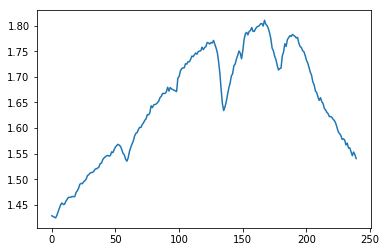

In [3]:
fig1 = plt.figure()
plt.plot(np.squeeze(spectraLib[656, :]))

In [4]:
'Get the abundance vectors associated with the chosen MICA endmembers'
sliName = '/Volume2/arunFiles/python_HSITools/crismBalancingDatasets/dataProducts/micaEMAbundance_reduced.sli'
hdrName = sliName.replace('.sli', '.sli.hdr')

In [5]:
crmicaSLI = envi.open(hdrName, sliName)
crmica_data = crmicaSLI.spectra

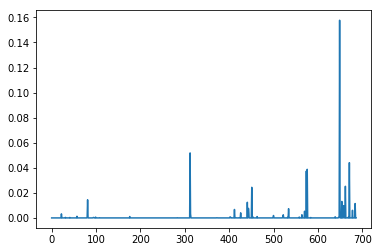

In [6]:
plt.plot(range(687), crmica_data[0,:])

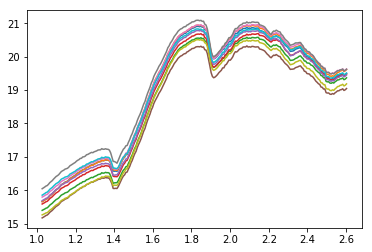

In [7]:
idx = 8
mu=np.squeeze(crmica_data[idx, :])
sigma = (0.001*np.identity(687))
s = np.abs(np.random.multivariate_normal(mu, sigma,10))
#s[s<= 0.01] = 0
#tempSpectra = np.matmul(np.squeeze(crmica_data[idx, :]), spectraLib)
tempSpectra = np.matmul(s, spectraLib)

fig2 = plt.figure()
plt.plot(wvl, tempSpectra.T)

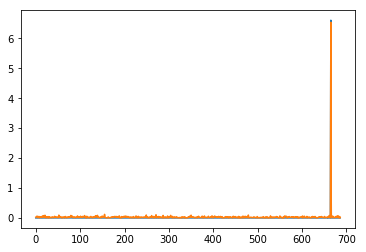

In [8]:
fig3 = plt.figure()
plt.plot(range(687), mu, s[3, :])

# Dirichlet Distribution
In this portion we will look at  a dirichlet distribution which is weighted towards the corners

In [9]:
corners = np.array([[0, 0], [1, 0], [0.5, 0.75**0.5]])
triangle = tri.Triangulation(corners[:, 0], corners[:, 1])

In [10]:
midpoints = [(corners[(i + 1) % 3] + corners[(i+2) % 3]) / 2. for i in range(3)]

def xy2bc(xy, tol=1.e-3):
    s  = [(corners[i] - midpoints[i]).dot(xy - midpoints[i]) / 0.75 for i in range(3)]
    return np.clip(s, tol, 1- tol)

In [11]:
class Dirichlet(object):
    def __init__(self, alpha):
        from math import gamma
        from operator import mul
        self._alpha = np.array(alpha)
        self._coef = gamma(np.sum(self._alpha)) / reduce(mul, [gamma(a) for a in self._alpha])
        
    def pdf(self, x):
        '''Returns pdf value for x.'''
        from operator import mul
        return self._coef * reduce(mul, [xx ** (aa-1) 
                                        for (xx, aa) in zip(x, self._alpha)])
    
    def rCoef(self):
        return self._coef

In [12]:
def draw_pdf_contours(dist, nlevels=200, subdiv=8, **kwargs):
    import math
    
    refiner = tri.UniformTriRefiner(triangle)
    trimesh = refiner.refine_triangulation(subdiv=subdiv)
    pvals = [dist.pdf(xy2bc(xy)) for xy in zip(trimesh.x, trimesh.y)]
    
    plt.tricontourf(trimesh, pvals, nlevels, **kwargs)
    plt.axis('equal')
    plt.xlim(0, 1)
    plt.ylim(0, 0.75**0.5)
    plt.axis('off')

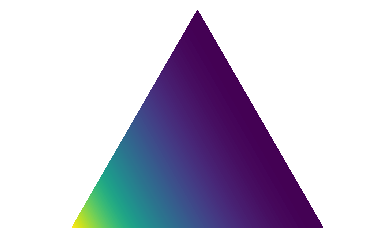

In [13]:
draw_pdf_contours(Dirichlet([3,1,1]))

In [14]:
Dirichlet([3,1,1]).rCoef()

12.0

In [15]:
from math import gamma
gamma(np.sum([3,1,1]))

24.0

In [16]:
from operator import mul
print reduce(mul, [gamma(a) for a in [3,1,1]])

2.0


In [17]:
[gamma(a) for a in [3,1,1]]

[2.0, 1.0, 1.0]

In [18]:
from scipy.stats import dirichlet

In [26]:
idx=5
#alpha = 1.5*np.ones(20)
#alpha[idx] = 150.
s = np.abs(np.random.normal(1.2,0.001,5))
s[0] =27
t1 = dirichlet.rvs(s, size=10000)
#print t1
print (np.mean(t1[:,0]))
print (np.std(t1[:,0]))

0.8495793724475424
0.06192920924947354


(array([   8.,   29.,  116.,  326.,  796., 1654., 2457., 2679., 1628.,
         307.]),
 array([0.56551918, 0.60793584, 0.6503525 , 0.69276916, 0.73518583,
        0.77760249, 0.82001915, 0.86243581, 0.90485247, 0.94726914,
        0.9896858 ]),
 <a list of 10 Patch objects>)

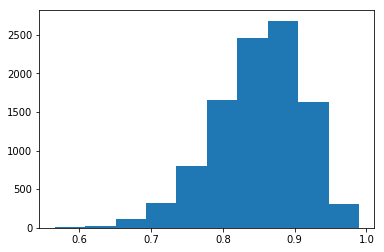

In [27]:
fig1 = plt.figure()
plt.hist(t1[:,0])

In [ ]:
listEM = list(xrange(0,20))
listEM.remove(idx)
print listEM

In [ ]:
import random
import itertools
random.sample(listEM, 4)

In [ ]:
import itertools
def shuffled_SubSet(arr, numCols=''):
    'Get size of matrix'
    nrows, ncols = arr.shape
    'set default to return all columns'
    if not numCols:
        numCols = ncols
    
    if numCols >= ncols:
        numCols = ncols
        
    all_perm = np.array((list(itertools.permutations(range(ncols)))))
    b = all_perm[np.random.randint(0, all_perm.shape[0], size=nrows)]
    arrShuff = (arr.flatten()[(b+3*np.arange(nrows)[...,np.newaxis]).flatten()]).reshape(arr.shape)
    return arrShuff[:, :numCols]
    

In [ ]:
arra = np.zeros(shape=(10,20))
for ii in range(20):
    print(ii)
    arra[:,ii] = ii+1

In [ ]:
arra_s = shuffled_SubSet(arra, numCols=2)

In [43]:
weights = np.random.random(size=(3,4))

In [44]:
temp1=np.array([[0,0], [1,1], [2,2]])
temp=np.array([[0,1], [2,0], [1,2]])

In [45]:
weights

array([[0.48293675, 0.57142761, 0.71263458, 0.66516766],
       [0.30502529, 0.39679254, 0.70500273, 0.53059623],
       [0.44794914, 0.46998634, 0.31404336, 0.16846961]])

In [46]:
weights[temp1, temp] = 0

In [47]:
weights

array([[0.        , 0.        , 0.71263458, 0.66516766],
       [0.        , 0.39679254, 0.        , 0.53059623],
       [0.44794914, 0.        , 0.        , 0.16846961]])